# Evaluation: Precision & Recall

Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics.

We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 

In [1]:
# Libraries
from sklearn.datasets import fetch_openml
import numpy as np

In [2]:
# Load data
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

#### Now take a look at the shapes of the X and y matrices.

In [3]:
# your code here
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

#### Let's pick one entry and see what number is written. Use indexing to pick the 36000th digit.

In [5]:
# your code here
y[36000]

'9'

In [6]:
X[36000].shape

(784,)

####  Use the *reshape(28,28)* method and *plt.imshow()* function with the parameters *cmap = matplotlib.cm.binary* and *interpolation="nearest"* to make a plot of the number. Be sure to import matplotlib.

In [35]:
# your code here
import matplotlib as plt
import matplotlib.pyplot
X[36000].reshape(28,28)

plt.pyplot.imshow(X[36000].reshape(28,28), cmap = plt.cm.binary , interpolation="nearest" )

#### Use indexing to see if what the plot shows matches with the outcome of the 36000th index.

In [ ]:
# your code here

#### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training and the rest for testing.

In [12]:
# your code here
#X_train, X_test, y_train,  y_test = train_test_split(website_dummy_x, website_dummy_y, test_size=0.2)


X_train = X[0:60000]
y_train = y[0:60000] 
X_test = X[60000:]
y_test = y[60000:]


#### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5.

In [13]:
# your code here

y_train_bin = np.where(y_train=='5',1,0)
y_test_bin = np.where(y_test=='5',1,0)



#### Lets train a logistic regression to predict if a number is a 5 or not. Remember to use the 'just 5s' target train array.

In [14]:
from sklearn.linear_model import LogisticRegression
y_train_model = LogisticRegression(random_state=0).fit(X_train, y_train_bin)


C:\Users\ellio\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Does the classifier predict correctly the 36000th digit we picked before?

In [33]:
# your code here
y_train_model.predict(X[36000].reshape(1,-1))

array([0])

In [ ]:
# your comments here
#Yes it did

#### The 35th value is a 5. Check if it was correctly predicted.

In [60]:
# your code here
y_train_model.predict(X[35].reshape(1,-1))

In [62]:
y_pred = y_train_model.predict(X_test)

In [ ]:
# your comments here
#Yes it did

#### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below.

In [36]:
# Libraries
from sklearn.base import BaseEstimator

In [37]:
# Dumb classifier
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1))[:, 0]

never_5_clf = Never5Classifier()

#### Now lets fit and predict on the testing set using our dumb classifier.

In [55]:
# your code here
never_5_clf.fit(X_train)


#### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [93]:
# your code here
dumb_pred = never_5_clf.predict(X_test)
dumb_pred


from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, auc

confusio = confusion_matrix(y_test_bin, dumb_pred)
print(confusio)
precision = precision_score(y_test_bin, dumb_pred)
recall = recall_score(y_test_bin, dumb_pred)
f1_score1 = f1_score(y_test_bin, dumb_pred)

print(precision)
print(recall)
print(f1_score1)

confusio = confusion_matrix(y_test_bin, y_pred)
print(confusio)
precision = precision_score(y_test_bin, y_pred)
print(precision)
recall = recall_score(y_test_bin, y_pred)
print(recall)
f1_score2 = f1_score(y_test_bin, y_pred)



print(f1_score2)

[[9108    0]
 [ 892    0]]
0.0
0.0
0.0
[[9027   81]
 [ 145  747]]
0.9021739130434783
0.8374439461883408
0.8686046511627907


C:\Users\ellio\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ellio\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


#### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
# your answer here
#all zeros

#### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each.

In [91]:
# your code here
import numpy as np
from sklearn import metrics
y = y_test_bin
scores = X_test
variable = y_train_model.predict_proba(X_test)[:,1]
#variable
fpr, tpr, thresholds = metrics.roc_curve(y_test_bin, variable) #2nd element is asking for
#fpr

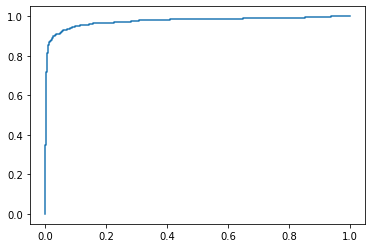

In [94]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)

roc_auc = auc(fpr, tpr)
#import auc

#### Now find the roc_auc_score for each. 

In [95]:
# your code here
print(roc_auc)

0.9747261806995673


#### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
# your answer here